## <center> Ejercicio <center>

Realice las operaciones necesarias (incluyendo operaciones morfológicas y desegmentación) sobre la imagen objects.png para conservar únicamente los dos bolígrafos preservando sus niveles de gris originales (el resto de la imagen debe quedar negra)

In [1]:
from skimage import io, color, filters, measure, morphology
import skimage.util as util
from scipy.ndimage import convolve
import matplotlib.pyplot as plt
import numpy as np

### 1. Cargar imagen

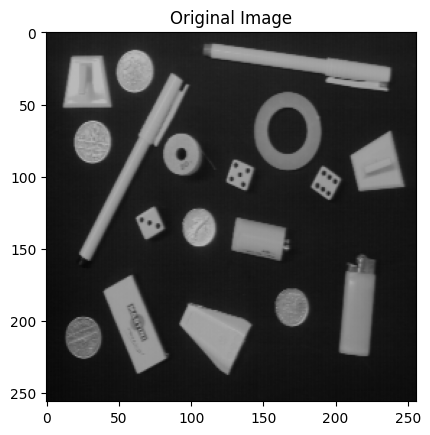

In [10]:
image_path = "../Imagenes/OBJECTS.png"
image = io.imread(image_path)
plt.title("Original Image")
plt.imshow(image)
plt.show()

### 2. Convertir imagen a escala de grises

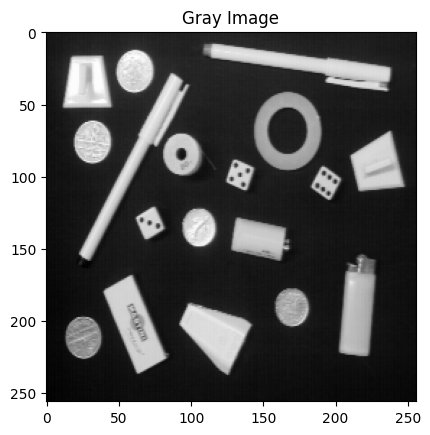

In [11]:
gray_image = color.rgb2gray(image)
plt.title("Gray Image")
plt.imshow(gray_image, cmap='gray')
plt.show()

### 3. Segmentación mediante umbralización y conversion a imagen binaria

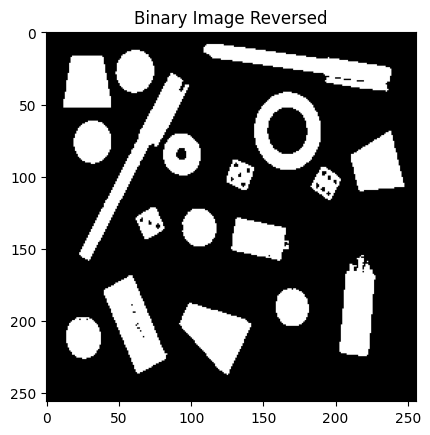

In [29]:
threshold = filters.threshold_otsu(gray_image)
binary_image = gray_image < threshold

# Binary Image Reversed
binary_image_reversed = np.logical_not(binary_image)
plt.title("Binary Image Reversed")
plt.imshow(binary_image_reversed, cmap='gray')
plt.show()

### 4. Limpieza de la imagen mediante operaciones morfológicas

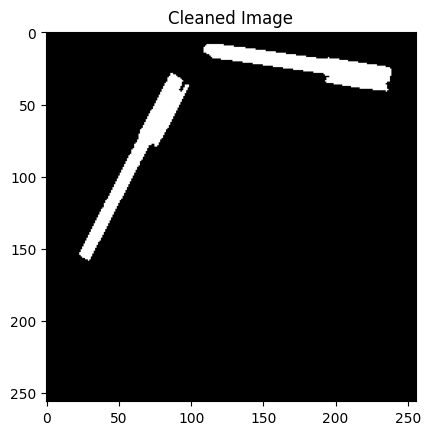

In [33]:
cleaned_image = morphology.remove_small_objects(binary_image_reversed, min_size=1500)
cleaned_image = morphology.remove_small_holes(cleaned_image, area_threshold=1500)
plt.title("Cleaned Image")
plt.imshow(cleaned_image, cmap='gray')
plt.show()

### 5. Detección de componentes conexos

In [ ]:
labels = measure.label(cleaned_image)
properties = measure.regionprops(labels)

### 6. Selección y creación de máscara para los bolígrafos

In [39]:
areas = [prop.area for prop in properties]
sorted_indices = np.argsort(areas)[::-1][:2]

mask = np.zeros_like(gray_image, dtype=bool)
for i in sorted_indices:
    mask[labels == properties[i].label] = True

### 7. Aplicación de la máscara a la imagen original

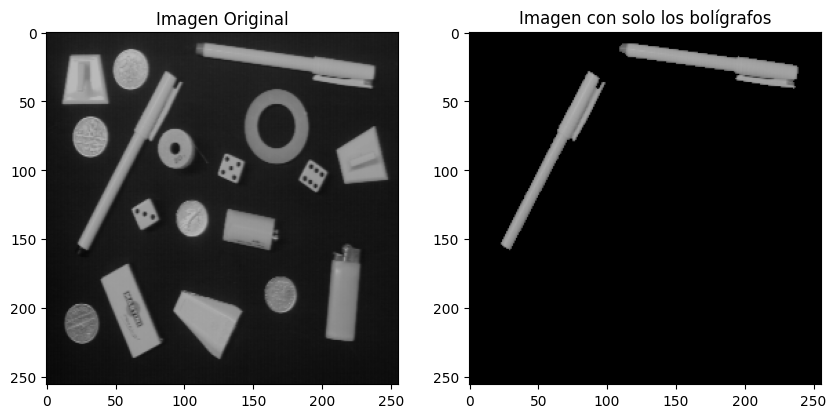

In [ ]:
result_image = np.zeros_like(image)
for i in range(3):
    result_image[..., i] = image[..., i] * mask

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Imagen Original")
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.title("Imagen con solo los bolígrafos")
plt.imshow(result_image)
plt.show()